In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

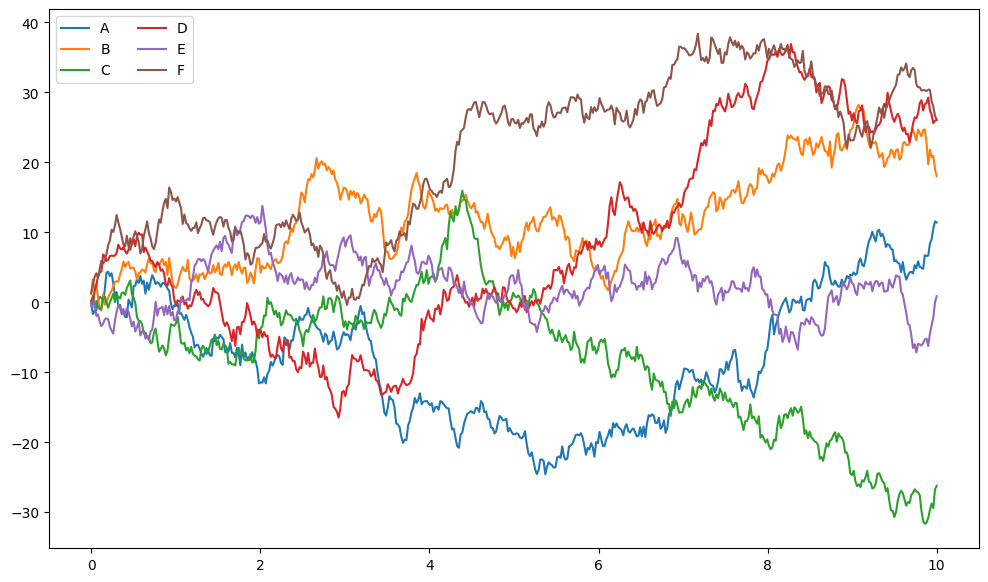

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Interacting with Crypto-data

In [1]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-08-01 19:11:55.980593')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

Bitcoin:

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-01 20:00:00,29249,29301,29200,29258,136.983616,4.006458e+06
2023-08-01 21:00:00,29261,29292,29162,29213,33.655054,9.829359e+05
2023-08-01 22:00:00,29213,29297,29184,29228,39.475312,1.153465e+06
2023-08-01 23:00:00,29196,29244,29184,29244,8.171777,2.387351e+05
2023-08-02 00:00:00,29241,29715,29241,29696,369.944700,1.090026e+07


<Axes: xlabel='CloseTime'>

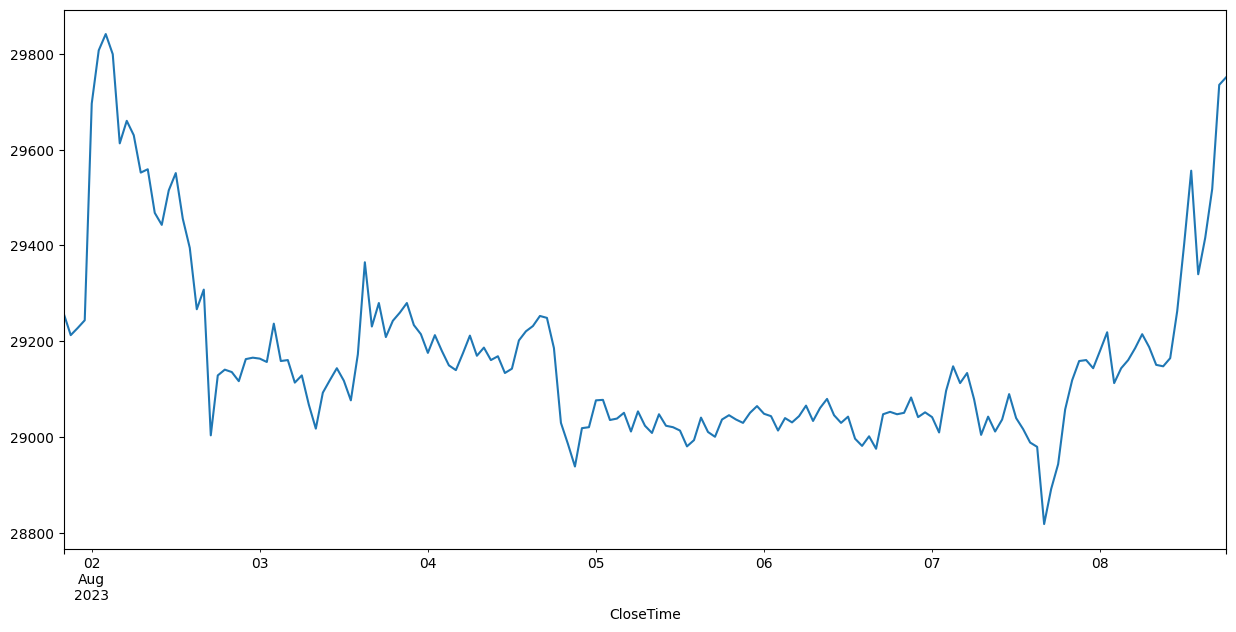

In [10]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ethereum:

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-01 20:00:00,1852.5,1855.4,1847.7,1850.0,297.025403,5.497382e+05
2023-08-01 21:00:00,1850.4,1852.5,1847.5,1849.6,51.181536,9.467894e+04
2023-08-01 22:00:00,1849.4,1851.5,1846.6,1849.1,34.832418,6.439546e+04
2023-08-01 23:00:00,1847.1,1851.1,1846.1,1850.6,41.213751,7.617660e+04
2023-08-02 00:00:00,1850.7,1873.9,1850.7,1872.7,768.832102,1.432240e+06


<Axes: xlabel='CloseTime'>

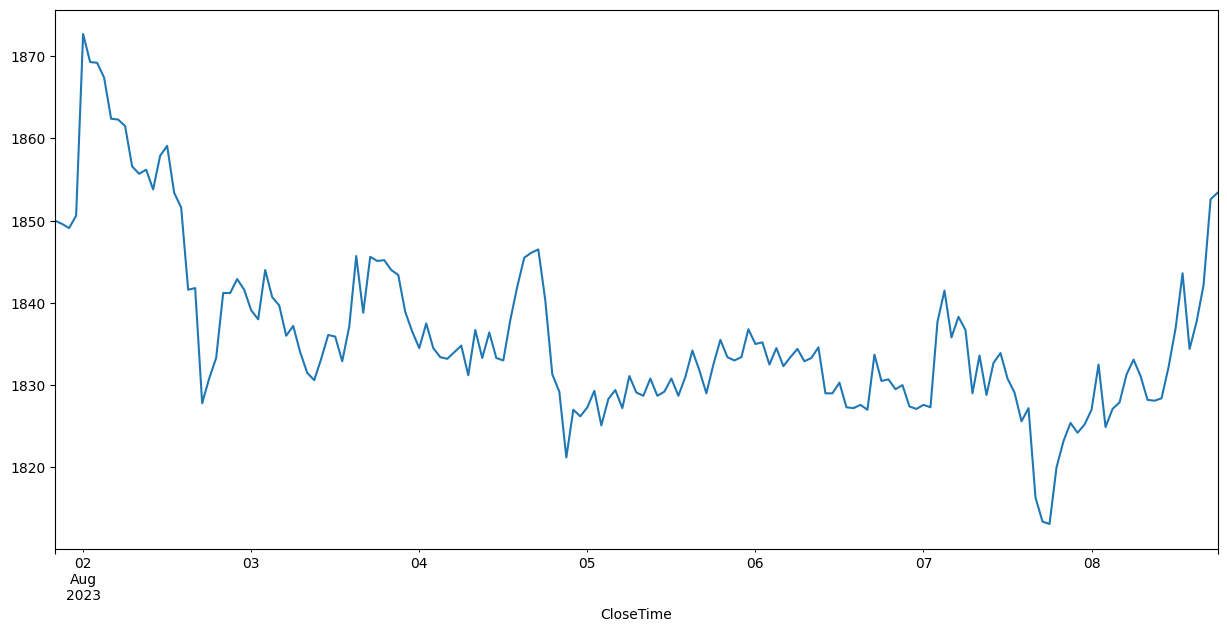

In [12]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-01 20:00:00,1852.5,1855.4,1847.7,1850.0,297.025403,5.497382e+05
2023-08-01 21:00:00,1850.4,1852.5,1847.5,1849.6,51.181536,9.467894e+04
2023-08-01 22:00:00,1849.4,1851.5,1846.6,1849.1,34.832418,6.439546e+04
2023-08-01 23:00:00,1847.1,1851.1,1846.1,1850.6,41.213751,7.617660e+04
2023-08-02 00:00:00,1850.7,1873.9,1850.7,1872.7,768.832102,1.432240e+06


Bokeh:

In [19]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


In [20]:
output_notebook()

Loading BokehJS ...

In [23]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_label='Ether')

p1.legend.location = "top_left"

show(p1)

Export to Excel: 

In [24]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [25]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [27]:
writer.save()

/tmp/ipykernel_57218/934276808.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
